In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [48]:
df = pd.read_csv('merged_Floor2.csv', index_col='Date', parse_dates=True)
df.head(5)

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,0.0,...,0.32,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,0.0,...,0.32,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,0.0,...,0.28,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,0.0,...,0.32,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,0.0,...,0.32,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [49]:
df.index.dtype

dtype('<M8[ns]')

In [50]:
df.isnull().sum()

z1_AC1(kW)       30242
z1_Light(kW)      1068
z1_Plug(kW)       1073
z1_S1(degC)     274638
z1_S1(RH%)      274638
z1_S1(lux)      274638
z2_AC1(kW)       30476
z2_AC2(kW)        2599
z2_AC3(kW)        2599
z2_AC4(kW)        2599
z2_AC5(kW)        1143
z2_AC6(kW)        1143
z2_AC7(kW)        1143
z2_AC8(kW)        1143
z2_AC9(kW)        1143
z2_AC10(kW)       1143
z2_AC11(kW)       1143
z2_AC12(kW)       1143
z2_AC13(kW)       1143
z2_AC14(kW)       1143
z2_Light(kW)      1174
z2_Plug(kW)       1222
z2_S1(degC)     260309
z2_S1(RH%)      260306
z2_S1(lux)      260308
z3_Light(kW)      1071
z3_Plug(kW)       1070
z3_S1(degC)     264820
z3_S1(RH%)      264819
z3_S1(lux)      264823
z4_AC1(kW)       30311
z4_Light(kW)      2599
z4_Plug(kW)       1222
z4_S1(degC)     368245
z4_S1(RH%)      368243
z4_S1(lux)      368248
dtype: int64

<AxesSubplot:>

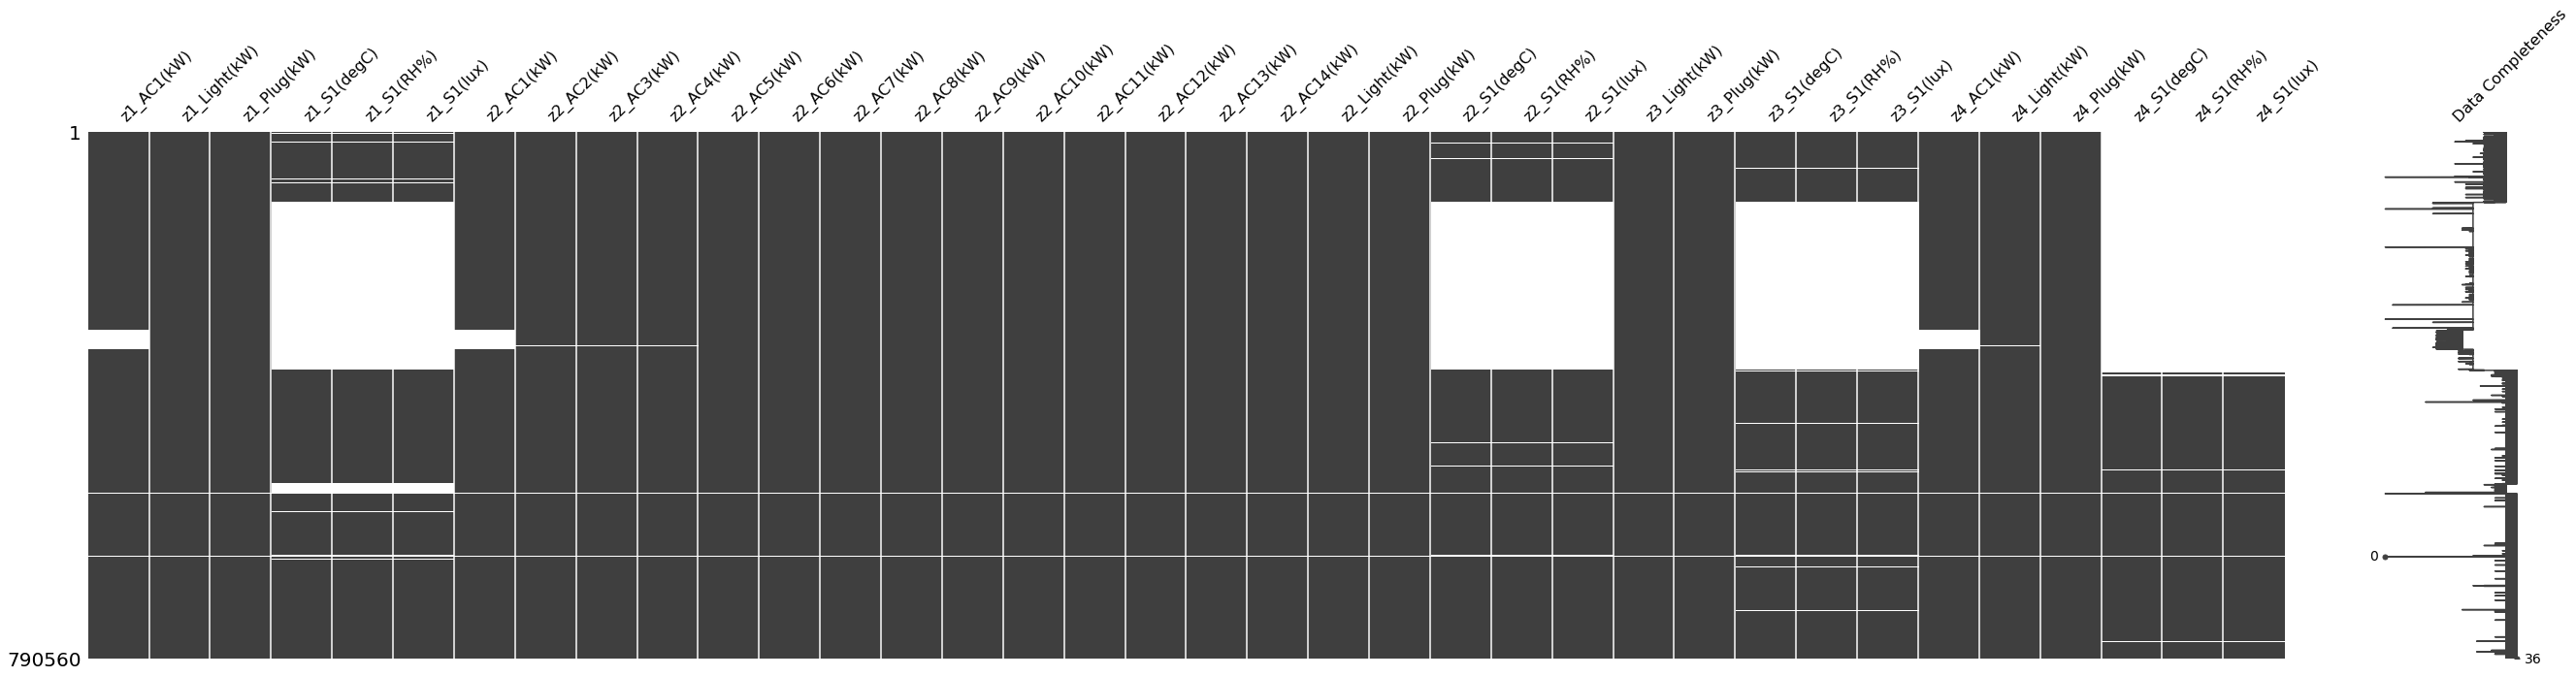

In [51]:
import missingno as msno
msno.matrix(df, labels=True,figsize=(45,10))

In [52]:
df = df.fillna(df.mean())

In [53]:
df.isnull().sum()

z1_AC1(kW)      0
z1_Light(kW)    0
z1_Plug(kW)     0
z1_S1(degC)     0
z1_S1(RH%)      0
z1_S1(lux)      0
z2_AC1(kW)      0
z2_AC2(kW)      0
z2_AC3(kW)      0
z2_AC4(kW)      0
z2_AC5(kW)      0
z2_AC6(kW)      0
z2_AC7(kW)      0
z2_AC8(kW)      0
z2_AC9(kW)      0
z2_AC10(kW)     0
z2_AC11(kW)     0
z2_AC12(kW)     0
z2_AC13(kW)     0
z2_AC14(kW)     0
z2_Light(kW)    0
z2_Plug(kW)     0
z2_S1(degC)     0
z2_S1(RH%)      0
z2_S1(lux)      0
z3_Light(kW)    0
z3_Plug(kW)     0
z3_S1(degC)     0
z3_S1(RH%)      0
z3_S1(lux)      0
z4_AC1(kW)      0
z4_Light(kW)    0
z4_Plug(kW)     0
z4_S1(degC)     0
z4_S1(RH%)      0
z4_S1(lux)      0
dtype: int64

In [54]:
df.describe()

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
count,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.00000,790560.000000,...,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000,790560.000000
mean,8.537406,2.706336,1.107082,24.700101,61.536675,27.906689,6.079580,0.628142,0.42145,0.471542,...,0.328631,27.590986,65.006414,2.681126,2.365327,0.596903,0.017949,23.548124,72.856257,13.459210
std,13.486406,3.584396,1.321380,2.224057,4.291956,28.349900,9.557068,0.526893,0.43888,0.490573,...,0.211450,1.251056,7.100072,2.448436,4.034720,0.833782,0.014648,2.419615,4.721515,14.125956
min,0.000000,0.000000,0.000000,17.560000,45.500000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,22.510000,33.100000,0.000000,0.000000,0.000000,0.000000,16.100000,44.570000,0.000000
25%,0.000000,0.010000,0.200000,24.400000,59.930000,0.000000,0.150000,0.230000,0.00000,0.000000,...,0.240000,27.230000,61.430000,0.000000,0.000000,0.000000,0.000000,23.548124,72.856257,0.000000
50%,0.000000,0.010000,0.310000,24.700101,61.536675,27.906689,1.070000,0.250000,0.00000,0.000000,...,0.300000,27.590986,65.006414,2.681126,0.000000,0.000000,0.030000,23.548124,72.856257,13.459210
75%,19.630000,7.400000,2.280000,25.870000,63.400000,32.000000,6.079580,1.170000,0.88000,0.990000,...,0.370000,28.170000,68.550000,4.000000,4.760000,1.570000,0.030000,24.630000,74.270000,13.459210
max,59.610000,22.380000,9.820000,31.900000,76.900000,96.000000,50.720000,2.430000,2.08000,2.040000,...,12.630000,32.140000,86.800000,16.000000,55.330000,3.770000,0.060000,31.900000,89.810000,88.000000


In [55]:
newdf=pd.DataFrame(columns=['lights','acs','plug'])
newdf

,lights,acs,plug


In [56]:
newdf['lights']=df['z1_Light(kW)']+df['z2_Light(kW)']+df['z3_Light(kW)']+df['z4_Light(kW)']
newdf['acs']=df['z1_AC1(kW)']+df['z2_AC1(kW)']+df['z2_AC2(kW)']+df['z2_AC3(kW)']+df['z2_AC4(kW)']+df['z2_AC5(kW)']+df['z2_AC6(kW)']+df['z2_AC7(kW)']+df['z2_AC8(kW)']+df['z2_AC9(kW)']+df['z2_AC10(kW)']+df['z2_AC11(kW)']+df['z2_AC12(kW)']+df['z2_AC13(kW)']+df['z2_AC14(kW)']+df['z4_AC1(kW)']
newdf['plug']=df['z1_Plug(kW)']+df['z2_Plug(kW)']+df['z3_Plug(kW)']+df['z4_Plug(kW)']

In [57]:
newdf.head(5)

,lights,acs,plug
Date,,,
2018-07-01 00:00:00,0.02,7.45,0.57
2018-07-01 00:01:00,0.02,7.43,0.57
2018-07-01 00:02:00,0.02,6.19,0.52
2018-07-01 00:03:00,0.02,7.36,0.56
2018-07-01 00:04:00,0.02,7.31,0.56


In [58]:
newdf['Power_consumption']=newdf['lights']+newdf['acs']+newdf['plug']
newdf.head(5)

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01 00:00:00,0.02,7.45,0.57,8.04
2018-07-01 00:01:00,0.02,7.43,0.57,8.02
2018-07-01 00:02:00,0.02,6.19,0.52,6.73
2018-07-01 00:03:00,0.02,7.36,0.56,7.94
2018-07-01 00:04:00,0.02,7.31,0.56,7.89


In [59]:
df6 = pd.DataFrame(data=newdf)

In [13]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    data.drop(col,axis=1,inplace = True)
    return data

In [14]:
# Set 15 minutes as a lagging time unit, therefore lagging time will be 15 min * n, such as 15 min, 30 min, 1 hour and so on. 
# The smaller this lagging time unit is, the better the predicting result is. 

def get_lag(data, col, lagtime):
    for i in range(1,lagtime+1):
        if len(pd.Series(col)) == 1:
            data[col+"_lag"+str(i)] = data[col].shift(i*15)
        else:
            for col_j in col:
                data[col_j+"_lag"+str(i)] = data[col_j].shift(i*15)
    return data

In [15]:
# Create Time Series Features 

newdf['date'] = newdf.index

newdf['hour'] = newdf['date'].dt.hour
newdf = encode(newdf,'hour',24)

newdf['dayofweek'] = newdf['date'].dt.dayofweek
newdf = encode(newdf,'dayofweek',7)

newdf['month'] = newdf['date'].dt.month
newdf = encode(newdf,'month',12)

# newdf['year'] = newdf['date'].dt.year

newdf['dayofyear'] = newdf['date'].dt.dayofyear
newdf = encode(newdf,'dayofyear',365)

newdf['dayofmonth'] = newdf['date'].dt.day
newdf = encode(newdf,'dayofmonth',31)

#newdf['weekofyear'] = newdf['date'].dt.weekofyear

newdf.drop('date',axis=1,inplace = True)

In [16]:
newdf

,lights,acs,plug,Power_consumption,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,dayofmonth_sin,dayofmonth_cos
Date,,,,,,,,,,,,,,
2018-07-01 00:00:00,0.02,7.45,0.57,8.04,0.000000,1.000000,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,0.97953
2018-07-01 00:01:00,0.02,7.43,0.57,8.02,0.000000,1.000000,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,0.97953
2018-07-01 00:02:00,0.02,6.19,0.52,6.73,0.000000,1.000000,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,0.97953
2018-07-01 00:03:00,0.02,7.36,0.56,7.94,0.000000,1.000000,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,0.97953
2018-07-01 00:04:00,0.02,7.31,0.56,7.89,0.000000,1.000000,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,0.97953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.20,7.67,0.49,8.36,-0.258819,0.965926,0.781831,0.62349,-2.449294e-16,1.000000,6.432491e-16,1.000000,-2.449294e-16,1.00000
2019-12-31 23:56:00,0.20,7.71,0.49,8.40,-0.258819,0.965926,0.781831,0.62349,-2.449294e-16,1.000000,6.432491e-16,1.000000,-2.449294e-16,1.00000
2019-12-31 23:57:00,0.20,7.83,0.49,8.52,-0.258819,0.965926,0.781831,0.62349,-2.449294e-16,1.000000,6.432491e-16,1.000000,-2.449294e-16,1.00000


In [17]:
# adding lagging feature

# adding time lags of 15min,30min as features

lagtime = 2
lag_feature = ['lights','acs', 'plug']
newdf = get_lag(newdf, lag_feature, lagtime)

# adding time lags of 2 hours as features

newdf = get_lag(newdf, 'Power_consumption', 8)

newdf.drop(lag_feature,axis=1,inplace = True)

newdf.dropna(inplace=True)

In [18]:
newdf.head()

,Power_consumption,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,dayofmonth_sin,...,acs_lag2,plug_lag2,Power_consumption_lag1,Power_consumption_lag2,Power_consumption_lag3,Power_consumption_lag4,Power_consumption_lag5,Power_consumption_lag6,Power_consumption_lag7,Power_consumption_lag8
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 02:00:00,8.40,0.5,0.866025,-0.781831,0.62349,-0.5,-0.866025,0.008607,-0.999963,0.201299,...,7.43,0.52,7.87,7.97,6.75,7.79,8.44,7.81,6.66,8.04
2018-07-01 02:01:00,8.29,0.5,0.866025,-0.781831,0.62349,-0.5,-0.866025,0.008607,-0.999963,0.201299,...,7.45,0.52,8.00,7.99,8.03,7.83,8.42,7.74,8.04,8.02
2018-07-01 02:02:00,8.04,0.5,0.866025,-0.781831,0.62349,-0.5,-0.866025,0.008607,-0.999963,0.201299,...,7.39,0.54,7.97,7.97,7.93,7.90,8.27,7.68,8.04,6.73
2018-07-01 02:03:00,7.95,0.5,0.866025,-0.781831,0.62349,-0.5,-0.866025,0.008607,-0.999963,0.201299,...,7.40,0.52,7.94,7.94,7.98,7.98,8.16,7.65,7.98,7.94
2018-07-01 02:04:00,6.76,0.5,0.866025,-0.781831,0.62349,-0.5,-0.866025,0.008607,-0.999963,0.201299,...,7.38,0.52,7.96,7.94,8.02,6.75,7.95,7.63,7.99,7.89


In [19]:
split_date =pd.to_datetime( '2019-07-31')
df_train = newdf.loc[newdf.index <= split_date].copy()
df_train.shape

(568681, 25)

In [20]:
#df_test = pd.DataFrame(newdf.loc[newdf.index > split_date]
df_test = pd.DataFrame(newdf.loc[newdf.index > split_date])

df_test.shape

(221759, 25)

In [21]:
# The target is forecasting Global_active_power.
X_train, y_train = df_train.iloc[:,1:],df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,1:],df_test.iloc[:,0]

In [22]:
df_train

,Power_consumption,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,dayofmonth_sin,...,acs_lag2,plug_lag2,Power_consumption_lag1,Power_consumption_lag2,Power_consumption_lag3,Power_consumption_lag4,Power_consumption_lag5,Power_consumption_lag6,Power_consumption_lag7,Power_consumption_lag8
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 02:00:00,8.40,0.500000,0.866025,-0.781831,0.623490,-0.5,-0.866025,0.008607,-0.999963,2.012985e-01,...,7.43,0.52,7.87,7.97,6.75,7.79,8.44,7.81,6.66,8.04
2018-07-01 02:01:00,8.29,0.500000,0.866025,-0.781831,0.623490,-0.5,-0.866025,0.008607,-0.999963,2.012985e-01,...,7.45,0.52,8.00,7.99,8.03,7.83,8.42,7.74,8.04,8.02
2018-07-01 02:02:00,8.04,0.500000,0.866025,-0.781831,0.623490,-0.5,-0.866025,0.008607,-0.999963,2.012985e-01,...,7.39,0.54,7.97,7.97,7.93,7.90,8.27,7.68,8.04,6.73
2018-07-01 02:03:00,7.95,0.500000,0.866025,-0.781831,0.623490,-0.5,-0.866025,0.008607,-0.999963,2.012985e-01,...,7.40,0.52,7.94,7.94,7.98,7.98,8.16,7.65,7.98,7.94
2018-07-01 02:04:00,6.76,0.500000,0.866025,-0.781831,0.623490,-0.5,-0.866025,0.008607,-0.999963,2.012985e-01,...,7.38,0.52,7.96,7.94,8.02,6.75,7.95,7.63,7.99,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-30 23:56:00,4.55,-0.258819,0.965926,0.781831,0.623490,-0.5,-0.866025,-0.471160,-0.882048,-2.012985e-01,...,3.82,0.75,8.25,4.79,4.62,4.64,4.59,4.61,4.66,4.68
2019-07-30 23:57:00,4.57,-0.258819,0.965926,0.781831,0.623490,-0.5,-0.866025,-0.471160,-0.882048,-2.012985e-01,...,4.75,0.75,8.25,5.72,4.61,4.64,4.63,4.65,4.57,4.64
2019-07-30 23:58:00,4.54,-0.258819,0.965926,0.781831,0.623490,-0.5,-0.866025,-0.471160,-0.882048,-2.012985e-01,...,6.68,0.75,8.29,7.65,4.63,4.65,4.66,4.70,4.58,4.61


In [23]:
reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
train_predict=reg.predict(X_train)
test_predict=reg.predict(X_test)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5.968525140631641

In [26]:
split_date =pd.to_datetime( '2019-07-31')
df_train = newdf.loc[newdf.index <= split_date].copy()
df_train.shape

(568681, 25)

In [27]:
#df_test = pd.DataFrame(newdf.loc[newdf.index > split_date]
df_test = pd.DataFrame(newdf.loc[newdf.index > split_date])

df_test.shape

(221759, 25)

In [28]:
# The target is forecasting Global_active_power.
X1_train, y1_train = df_train.iloc[:,1:],df_train.iloc[:,0]
X1_test, y1_test = df_test.iloc[:,1:],df_test.iloc[:,0]

In [29]:
reg1 = xgb.XGBRegressor(n_estimators=1000)
reg1.fit(X1_train, y1_train,
        eval_set=[(X1_train, y1_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [30]:
train_predict=reg1.predict(X1_train)
test_predict=reg1.predict(X1_test)

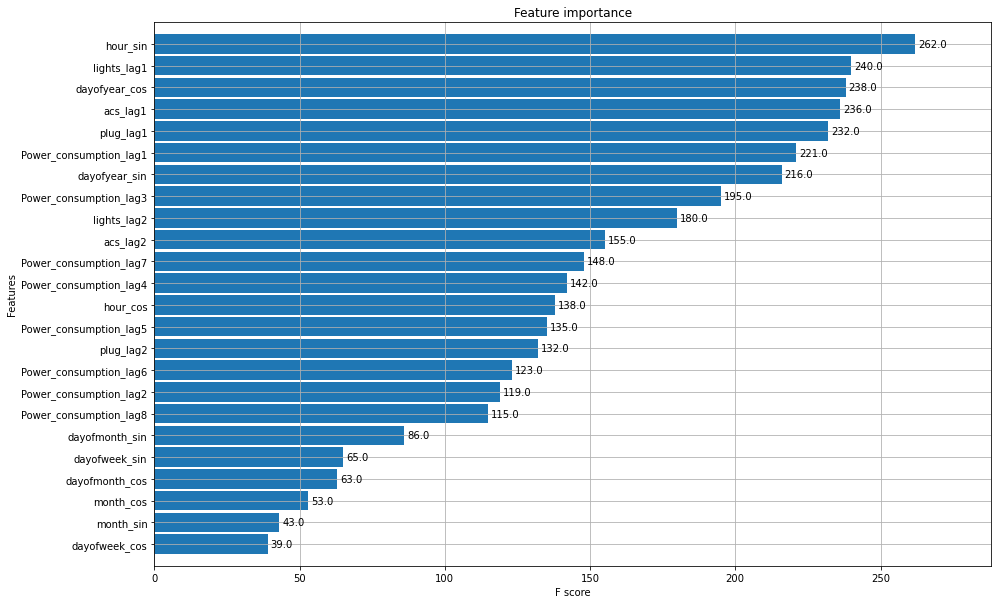

In [31]:
f, ax = plt.subplots(figsize=(15,10))
_ = plot_importance(reg, height=0.9,ax = ax)
plt.show()

In [32]:
df_test['Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

In [33]:
df_test['Prediction'].resample('D').mean()

Date
2019-07-31    40.065426
2019-08-01    37.982151
2019-08-02    36.468128
2019-08-03    16.016272
2019-08-04     5.559230
                ...    
2019-12-27    36.233803
2019-12-28     6.520915
2019-12-29     6.964535
2019-12-30     6.577518
2019-12-31     6.660695
Freq: D, Name: Prediction, Length: 154, dtype: float32

In [34]:
len(df_test['Prediction'])

221759

In [81]:
y=df_test['Prediction']


In [41]:
df_test[['Power_consumption','Prediction']]

,Power_consumption,Prediction
Date,,
2019-07-31 00:01:00,4.58,6.665398
2019-07-31 00:02:00,4.60,6.598408
2019-07-31 00:03:00,4.59,6.830665
2019-07-31 00:04:00,4.59,7.305239
2019-07-31 00:05:00,4.59,7.044813
...,...,...
2019-12-31 23:55:00,8.36,7.041624
2019-12-31 23:56:00,8.40,6.781197
2019-12-31 23:57:00,8.52,6.781197


In [37]:
df_test=df_test.drop('Power_consumption',axis=1)

KeyError: "['Power_consumption'] not found in axis"

In [39]:
df_test.columns

Index(['hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'month_sin',
       'month_cos', 'dayofyear_sin', 'dayofyear_cos', 'dayofmonth_sin',
       'dayofmonth_cos', 'lights_lag1', 'acs_lag1', 'plug_lag1', 'lights_lag2',
       'acs_lag2', 'plug_lag2', 'Power_consumption_lag1',
       'Power_consumption_lag2', 'Power_consumption_lag3',
       'Power_consumption_lag4', 'Power_consumption_lag5',
       'Power_consumption_lag6', 'Power_consumption_lag7',
       'Power_consumption_lag8', 'Prediction'],
      dtype='object')

In [46]:
newdf

,Power_consumption,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,dayofmonth_sin,...,acs_lag2,plug_lag2,Power_consumption_lag1,Power_consumption_lag2,Power_consumption_lag3,Power_consumption_lag4,Power_consumption_lag5,Power_consumption_lag6,Power_consumption_lag7,Power_consumption_lag8
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 02:00:00,8.40,0.500000,0.866025,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,...,7.43,0.52,7.87,7.97,6.75,7.79,8.44,7.81,6.66,8.04
2018-07-01 02:01:00,8.29,0.500000,0.866025,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,...,7.45,0.52,8.00,7.99,8.03,7.83,8.42,7.74,8.04,8.02
2018-07-01 02:02:00,8.04,0.500000,0.866025,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,...,7.39,0.54,7.97,7.97,7.93,7.90,8.27,7.68,8.04,6.73
2018-07-01 02:03:00,7.95,0.500000,0.866025,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,...,7.40,0.52,7.94,7.94,7.98,7.98,8.16,7.65,7.98,7.94
2018-07-01 02:04:00,6.76,0.500000,0.866025,-0.781831,0.62349,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,...,7.38,0.52,7.96,7.94,8.02,6.75,7.95,7.63,7.99,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,8.36,-0.258819,0.965926,0.781831,0.62349,-2.449294e-16,1.000000,6.432491e-16,1.000000,-2.449294e-16,...,6.99,0.49,8.48,7.67,6.88,4.48,4.46,4.41,7.54,4.53
2019-12-31 23:56:00,8.40,-0.258819,0.965926,0.781831,0.62349,-2.449294e-16,1.000000,6.432491e-16,1.000000,-2.449294e-16,...,7.01,0.49,8.38,7.69,5.84,4.41,4.42,4.43,6.50,4.56
2019-12-31 23:57:00,8.52,-0.258819,0.965926,0.781831,0.62349,-2.449294e-16,1.000000,6.432491e-16,1.000000,-2.449294e-16,...,7.05,0.49,8.41,7.73,4.51,4.53,4.44,4.42,4.63,6.57


In [90]:
#start=2018-07-01 00:00:00
#end=2019-07-29 23:59:00
x=(df6.index>'2018-07-01 00:00:00')&(df6.index<'2019-07-29 23:59:00')

In [91]:
z=df6['Power_consumption'].loc[x]


In [133]:

d = pd.DataFrame()

# Create datetimes and data
d['Date'] = pd.date_range(start ='1-1-2020', periods = 30)


In [139]:
d['prediction']=[20,23,26,25,30,29,10,12,11,13,15,12,30,27,33,27,20,17,16,21,17,20,23,26,35,36,32,27,25,26]
d.set_index('Date',inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [140]:
d

,prediction
Date,
2020-01-01,20
2020-01-02,23
2020-01-03,26
2020-01-04,25
2020-01-05,30
2020-01-06,29
2020-01-07,10
2020-01-08,12
2020-01-09,11


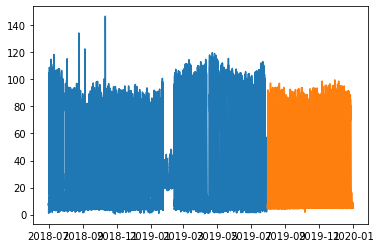

In [94]:
plt.plot(z)
plt.plot(y)

In [40]:
df_all.columns

Index(['Power_consumption', 'hour_sin', 'hour_cos', 'dayofweek_sin',
       'dayofweek_cos', 'month_sin', 'month_cos', 'dayofyear_sin',
       'dayofyear_cos', 'dayofmonth_sin', 'dayofmonth_cos', 'lights_lag1',
       'acs_lag1', 'plug_lag1', 'lights_lag2', 'acs_lag2', 'plug_lag2',
       'Power_consumption_lag1', 'Power_consumption_lag2',
       'Power_consumption_lag3', 'Power_consumption_lag4',
       'Power_consumption_lag5', 'Power_consumption_lag6',
       'Power_consumption_lag7', 'Power_consumption_lag8', 'Prediction'],
      dtype='object')

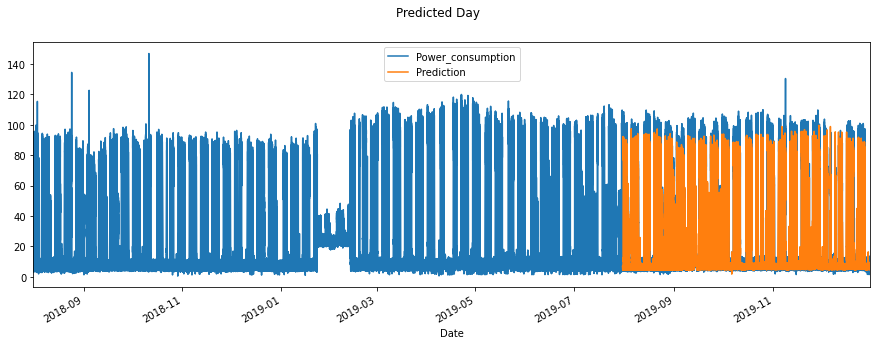

In [152]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Power_consumption','Prediction']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='08-01-2018', upper='12-31-2019')
plot = plt.suptitle('Predicted Day')
plt.show()

In [63]:
np.sqrt(mean_squared_error(df_test['Prediction'], df_test['Power_consumption']))

6.960397320737177

In [83]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(df_test['Prediction'], df_test['Power_consumption']))
print ('MSE:', metrics.mean_squared_error(df_test['Prediction'], df_test['Power_consumption']))
print ('RSME:', np.sqrt(metrics.mean_absolute_error(df_test['Prediction'], df_test['Power_consumption'])))

MAE: 3.7516090161265625
MSE: 48.44713086252526
RSME: 1.936907074726757


In [84]:
from sklearn.metrics import r2_score
Accuracy=r2_score(df_test['Prediction'], df_test['Power_consumption'])*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 94.86


# Daily basis

In [96]:
df=df.resample('D').mean()
df

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01,0.000000,0.011181,0.148569,28.829100,59.550130,4.244436,0.647590,0.829104,0.614056,0.697528,...,0.308646,29.680406,68.206253,1.650583,0.000000,0.000000,0.00000,23.548124,72.856257,13.459210
2018-07-02,16.077833,4.752167,1.705139,25.628065,54.823306,41.346584,10.072688,0.414056,0.220486,0.256292,...,0.485264,29.026432,62.237622,2.548469,3.923000,1.186889,0.00000,23.548124,72.856257,13.459210
2018-07-03,13.754271,4.849236,1.768806,25.157298,53.544436,41.107687,10.568188,0.196653,0.013382,0.015556,...,0.526590,28.705906,59.650834,2.572936,3.848014,1.132917,0.00000,23.548124,72.856257,13.459210
2018-07-04,13.021611,4.898472,1.918333,25.333495,53.713072,45.317565,10.536125,0.469597,0.270382,0.305799,...,0.492743,28.741982,60.561690,2.699547,3.484625,1.197646,0.00000,23.548124,72.856257,13.459210
2018-07-05,13.400868,4.908486,1.723681,25.214683,53.668641,43.808149,11.326944,0.531299,0.331132,0.377549,...,0.484375,28.511703,59.373209,2.379851,3.873375,1.031215,0.00000,23.548124,72.856257,13.459210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,10.254542,4.058569,1.633931,23.710958,59.788238,41.160982,9.319604,0.481819,0.278354,0.316785,...,0.288097,26.685433,62.022361,3.698641,2.945549,0.881444,0.02116,22.089533,70.772018,20.969069
2019-12-28,0.000000,0.010646,0.179896,25.570556,60.438231,0.665148,0.518021,0.644500,0.431750,0.484986,...,0.235250,27.369064,60.590384,1.421085,0.000000,0.000000,0.00000,25.067352,67.131968,0.373307
2019-12-29,0.000000,0.316319,0.188861,26.412250,60.751079,7.529732,0.506333,0.681292,0.471986,0.520285,...,0.235160,27.711626,55.873037,2.562057,0.000000,0.048604,0.00000,26.037845,63.773252,0.328416


In [97]:
daily_df=pd.DataFrame(columns=['lights','acs','plug'])
daily_df

,lights,acs,plug


In [98]:
daily_df['lights']=df['z1_Light(kW)']+df['z2_Light(kW)']+df['z3_Light(kW)']+df['z4_Light(kW)']
daily_df['acs']=df['z1_AC1(kW)']+df['z2_AC1(kW)']+df['z2_AC2(kW)']+df['z2_AC3(kW)']+df['z2_AC4(kW)']+df['z2_AC5(kW)']+df['z2_AC6(kW)']+df['z2_AC7(kW)']+df['z2_AC8(kW)']+df['z2_AC9(kW)']+df['z2_AC10(kW)']+df['z2_AC11(kW)']+df['z2_AC12(kW)']+df['z2_AC13(kW)']+df['z2_AC14(kW)']+df['z4_AC1(kW)']
daily_df['plug']=df['z1_Plug(kW)']+df['z2_Plug(kW)']+df['z3_Plug(kW)']+df['z4_Plug(kW)']

In [99]:
daily_df['Power_consumption']=daily_df['lights']+daily_df['acs']+daily_df['plug']
daily_df.head(5)

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01,0.091840,7.352958,0.525667,7.970465
2018-07-02,7.355410,34.890465,2.509278,44.755153
2018-07-03,7.417854,32.265833,2.619201,42.302889
2018-07-04,7.618875,31.681694,2.745785,42.046354
2018-07-05,7.505743,33.566118,2.498472,43.570333


In [100]:
def daily_lag(data, col, lagtime):
    for i in range(1,lagtime+1):
        if len(pd.Series(col)) == 1:
            data[col+"_lag"+str(i)] = data[col].shift(i*2)
        else:
            for col_j in col:
                data[col_j+"_lag"+str(i)] = data[col_j].shift(i*2)
    return data

In [101]:
# Create Time Series Features 

daily_df['date'] = daily_df.index

# newdf['hour'] = newdf['date'].dt.hour
# newdf = encode(newdf,'hour',24)

daily_df['dayofweek'] = daily_df['date'].dt.dayofweek
daily_df = encode(daily_df,'dayofweek',7)

daily_df['month'] = daily_df['date'].dt.month
daily_df = encode(daily_df,'month',12)

# newdf['year'] = newdf['date'].dt.year

daily_df['dayofyear'] = daily_df['date'].dt.dayofyear
daily_df = encode(daily_df,'dayofyear',365)

daily_df['dayofmonth'] = daily_df['date'].dt.day
daily_df = encode(daily_df,'dayofmonth',31)

#newdf['weekofyear'] = newdf['date'].dt.weekofyear

daily_df.drop('date',axis=1,inplace = True)

In [102]:
daily_df

,lights,acs,plug,Power_consumption,dayofweek_sin,dayofweek_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,dayofmonth_sin,dayofmonth_cos
Date,,,,,,,,,,,,
2018-07-01,0.091840,7.352958,0.525667,7.970465,-0.781831,0.623490,-5.000000e-01,-0.866025,8.606997e-03,-0.999963,2.012985e-01,0.979530
2018-07-02,7.355410,34.890465,2.509278,44.755153,0.000000,1.000000,-5.000000e-01,-0.866025,-8.606997e-03,-0.999963,3.943559e-01,0.918958
2018-07-03,7.417854,32.265833,2.619201,42.302889,0.781831,0.623490,-5.000000e-01,-0.866025,-2.581844e-02,-0.999667,5.712682e-01,0.820763
2018-07-04,7.618875,31.681694,2.745785,42.046354,0.974928,-0.222521,-5.000000e-01,-0.866025,-4.302223e-02,-0.999074,7.247928e-01,0.688967
2018-07-05,7.505743,33.566118,2.498472,43.570333,0.433884,-0.900969,-5.000000e-01,-0.866025,-6.021328e-02,-0.998186,8.486443e-01,0.528964
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,6.310729,27.680146,2.151625,36.142500,-0.433884,-0.900969,-2.449294e-16,1.000000,-6.880243e-02,0.997630,-7.247928e-01,0.688967
2019-12-28,0.232903,5.852451,0.485222,6.570576,-0.974928,-0.222521,-2.449294e-16,1.000000,-5.161967e-02,0.998667,-5.712682e-01,0.820763
2019-12-29,0.747597,5.970542,0.499299,7.217437,-0.781831,0.623490,-2.449294e-16,1.000000,-3.442161e-02,0.999407,-3.943559e-01,0.918958


In [103]:
# adding lagging feature

# adding time lags of 2days as features

lagtime = 2
lag_feature = ['lights','acs', 'plug']
daily_df = daily_lag(daily_df, lag_feature, lagtime)

# adding time lags of 10 days as features

daily_df = daily_lag(daily_df, 'Power_consumption', 5) #lag time 10 days

daily_df.drop(lag_feature,axis=1,inplace = True)

daily_df.dropna(inplace=True)

In [104]:
split_date =pd.to_datetime( '2019-07-31')
daily_train = daily_df.loc[daily_df.index <= split_date].copy()
daily_train.shape

(386, 20)

In [105]:
#df_test = pd.DataFrame(newdf.loc[newdf.index > split_date]
daily_test = pd.DataFrame(daily_df.loc[daily_df.index > split_date])

daily_test.shape

(153, 20)

In [106]:
X_train, y_train = daily_train.iloc[:,1:],daily_train.iloc[:,0]
X_test, y_test = daily_test.iloc[:,1:],daily_test.iloc[:,0]

In [107]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

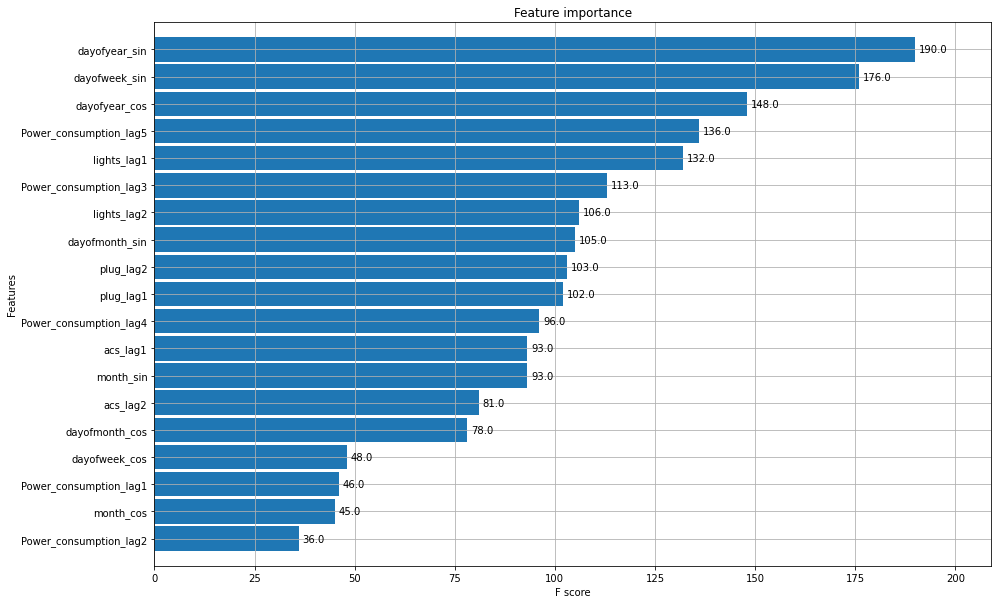

In [108]:
f, ax = plt.subplots(figsize=(15,10))
_ = plot_importance(reg, height=0.9,ax = ax)
plt.show()

In [109]:
daily_test['daily_Prediction'] = reg.predict(X_test)
daily_all = pd.concat([daily_test, daily_train], sort=False)

In [110]:
daily_test[['Power_consumption','daily_Prediction']]

,Power_consumption,daily_Prediction
Date,,
2019-08-01,37.815007,37.017952
2019-08-02,37.231764,31.563021
2019-08-03,14.481813,18.292929
2019-08-04,5.479500,7.180878
2019-08-05,38.511906,37.340645
...,...,...
2019-12-27,36.142500,28.501707
2019-12-28,6.570576,11.356697
2019-12-29,7.217437,7.416378


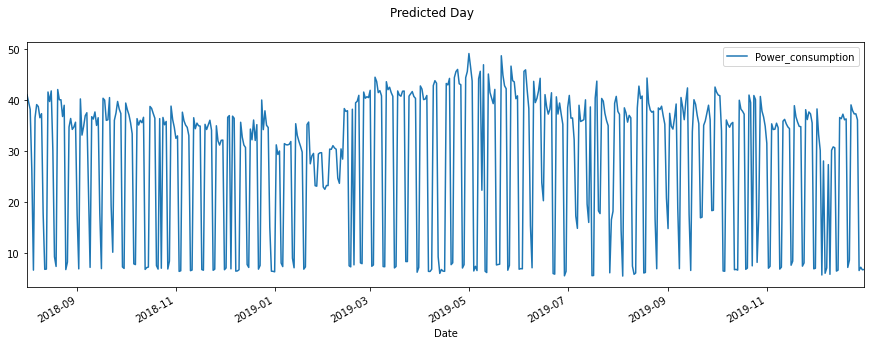

In [111]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = daily_all[['Power_consumption']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='08-01-2018', upper='12-31-2019')
plot = plt.suptitle('Predicted Day')
plt.show()

In [112]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(daily_test['daily_Prediction'], daily_test['Power_consumption']))
print ('MSE:', metrics.mean_squared_error(daily_test['daily_Prediction'], daily_test['Power_consumption']))
print ('RSME:', np.sqrt(metrics.mean_absolute_error(daily_test['daily_Prediction'], daily_test['Power_consumption'])))

MAE: 4.510463088824073
MSE: 51.004834921573526
RSME: 2.1237850853662366


In [141]:
from sklearn.metrics import r2_score
Accuracy=r2_score(daily_test['daily_Prediction'], daily_test['Power_consumption'])*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 65.48


<AxesSubplot:xlabel='Date'>

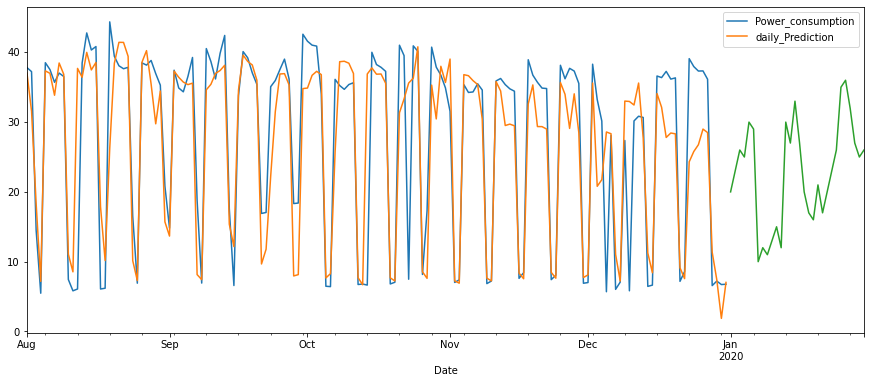

In [150]:
daily_test[['Power_consumption','daily_Prediction']].plot(figsize=(15,6))
d['prediction'].plot(figsize=(15,6))
#df['some_column'].plot(figsize=(10, 5))